In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

mushrooms = 'C:/Users/Jonathan/Downloads/mushrooms.csv'
data = pd.read_csv(mushrooms)

In [5]:
# seperating X vaules from y values
X= data.iloc[:,1:]
y = data.iloc[:,0]

In [6]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict (LabelEncoder)
Xfit = X.apply(lambda x: d[x.name].fit_transform(x))

In [7]:
le_y = LabelEncoder()
yfit = le_y.fit_transform(y)
# for x in Xfit.columns:
#     print(x)
#     print(Xfit[x].value_counts())

In [8]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
ohc = defaultdict (OneHotEncoder)
# Xfit_ohc = Xfit.apply(lambda x: ohc[x.name].fit_transform(x))
final = pd.DataFrame()

for i in range(22):
    # transforming the columns using One hot encoder
    Xtemp_i = pd.DataFrame(ohc[Xfit.columns[i]].fit_transform(Xfit.iloc[:,i:i+1]).toarray())
   
    #Naming the columns as per label encoder
    ohc_obj  = ohc[Xfit.columns[i]]
    labelEncoder_i= d[Xfit.columns[i]]
    Xtemp_i.columns= Xfit.columns[i]+"_"+labelEncoder_i.inverse_transform(ohc_obj.active_features_)
    
    # taking care of dummy variable trap
    X_ohc_i = Xtemp_i.iloc[:,1:]
    
    #appending the columns to final dataframe
    final = pd.concat([final,X_ohc_i],axis=1)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final, yfit, test_size = 0.7, random_state = 0)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors=30,p=2, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[2963,    5],
       [   6, 2713]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9980657640232108

In [41]:
classif =  KNeighborsClassifier(n_neighbors=4,p=2, metric='minkowski')
classif.fit(X_train,y_train)
y_pred = classif.predict(X_test)
accuracy_score(y_test,y_pred)

0.9989449621944786

In [42]:
classif =  KNeighborsClassifier(n_neighbors=3,p=2, metric='minkowski')
classif.fit(X_train,y_train)
y_pred = classif.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [43]:
classif =  KNeighborsClassifier(n_neighbors=2,p=2, metric='minkowski')
classif.fit(X_train,y_train)
y_pred = classif.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [44]:
classif =  KNeighborsClassifier(n_neighbors=1,p=2, metric='minkowski')
classif.fit(X_train,y_train)
y_pred = classif.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [45]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,4))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in myList[::2]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 1


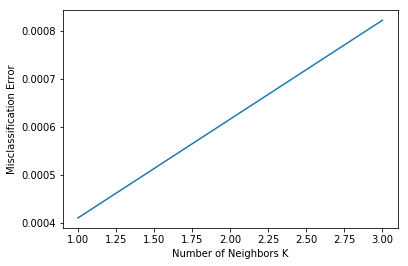

In [46]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = myList[::2][MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(myList[::2], MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,4))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in myList[::2]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 3


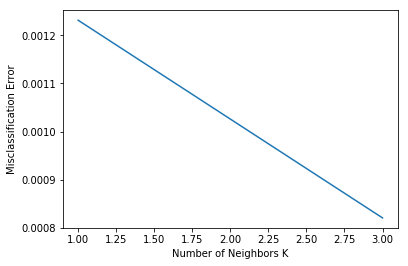

In [49]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = myList[::2][MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(myList[::2], MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final, yfit, test_size = 0.5, random_state = 0)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors=30,p=2, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[2110,    0],
       [   4, 1948]], dtype=int64)

In [53]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,4))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in myList[::2]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 1


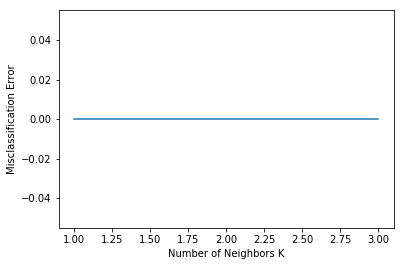

In [57]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = myList[::2][MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(myList[::2], MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [58]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,4))

# empty list that will hold cv scores
cv_scores = []

# perform 2-fold cross validation
for k in myList[::2]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 1


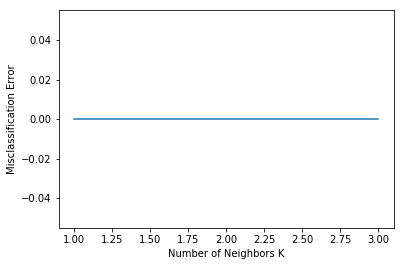

In [59]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = myList[::2][MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(myList[::2], MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()